### Importation des libs 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Chargement des données 

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv("dataFlight.csv", encoding='ISO-8859-1', error_bad_lines=False,delimiter=',')
data.shape

### Nettoyage des données
On garde que les données à partir de 2003, car dans la description de notre jeux de données les causes des retards ne sont renseignées que pour les vols de 2003 et plus.

In [ ]:
data=(data[data['Year']>2002])

data[['SecurityDelay','CarrierDelay','WeatherDelay','NASDelay','LateAircraftDelay','DepDelayMinutes']] = data[['SecurityDelay','CarrierDelay','WeatherDelay','NASDelay','LateAircraftDelay','DepDelayMinutes']].fillna(value=0)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.shape

### Affichage des données 

In [ ]:
data.head()

### Choix des colonnes

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
column_list = list(data.columns)

# print the list of column names
print(len(column_list))
print(column_list)

In [51]:
df = data.loc[:, ['Year','Quarter','Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'Flight_Number_Reporting_Airline',
'Origin', 'OriginCityName', 'OriginState', 'OriginStateName', 'Dest', 'DestCityName', 'DestState', 'DestStateName', 'DestWac',
'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'CRSArrTime', 'ArrTime', 'ArrDelayMinutes', 'Cancelled',
'Diverted', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginState,OriginStateName,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelayMinutes,CRSArrTime,ArrTime,ArrDelayMinutes,Cancelled,Diverted,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,2009,2,5,28,4,2009-05-28,FL,671,MKE,"Milwaukee, WI",WI,Wisconsin,MCO,"Orlando, FL",FL,Florida,33,1204,1202.0,0.0,1541,1541.0,0.0,0.0,0.0,1.0,1066.0,5,0.0,0.0,0.0,0.0,0.0
2,2013,2,6,29,6,2013-06-29,MQ,3297,GJT,"Grand Junction, CO",CO,Colorado,DFW,"Dallas/Fort Worth, TX",TX,Texas,74,1630,1644.0,14.0,1945,1942.0,0.0,0.0,0.0,1.0,773.0,4,0.0,0.0,0.0,0.0,0.0
3,2010,3,8,31,2,2010-08-31,DL,1806,LAX,"Los Angeles, CA",CA,California,DTW,"Detroit, MI",MI,Michigan,43,1305,1305.0,0.0,2035,2015.0,0.0,0.0,0.0,1.0,1979.0,8,0.0,0.0,0.0,0.0,0.0
4,2006,1,1,15,7,2006-01-15,US,465,EWR,"Newark, NJ",NJ,New Jersey,CLT,"Charlotte, NC",NC,North Carolina,36,1820,1911.0,51.0,2026,2058.0,32.0,0.0,0.0,1.0,529.0,3,0.0,0.0,0.0,0.0,32.0
6,2006,3,8,7,1,2006-08-07,CO,1431,BOS,"Boston, MA",MA,Massachusetts,CLE,"Cleveland, OH",OH,Ohio,44,1755,1751.0,0.0,2000,2002.0,2.0,0.0,0.0,1.0,563.0,3,0.0,0.0,0.0,0.0,0.0


### Analyses des données

In [85]:
df_filtered = df[(df["DepDelayMinutes"] >= 0)]
stats = df_filtered["DepDelayMinutes"].describe()

print("Statistiques de DepDelayMinutes :")
print(f"Nombre de valeurs non nulles : {stats['count']:.0f}")
print(f"Moyenne : {stats['mean']:.2f}")
print(f"Écart type : {stats['std']:.2f}")
print(f"Valeur minimale : {stats['min']:.0f}")
print(f"Premier quartile (Q1) : {stats['25%']:.2f}")
print(f"Médiane (deuxième quartile) : {stats['50%']:.2f}")
print(f"Troisième quartile (Q3) : {stats['75%']:.2f}")
print(f"Valeur maximale : {stats['max']:.0f}")

Statistiques de DepDelayMinutes :
Nombre de valeurs non nulles : 1164841
Moyenne : 11.58
Écart type : 35.18
Valeur minimale : 0
Premier quartile (Q1) : 0.00
Médiane (deuxième quartile) : 0.00
Troisième quartile (Q3) : 7.00
Valeur maximale : 1878


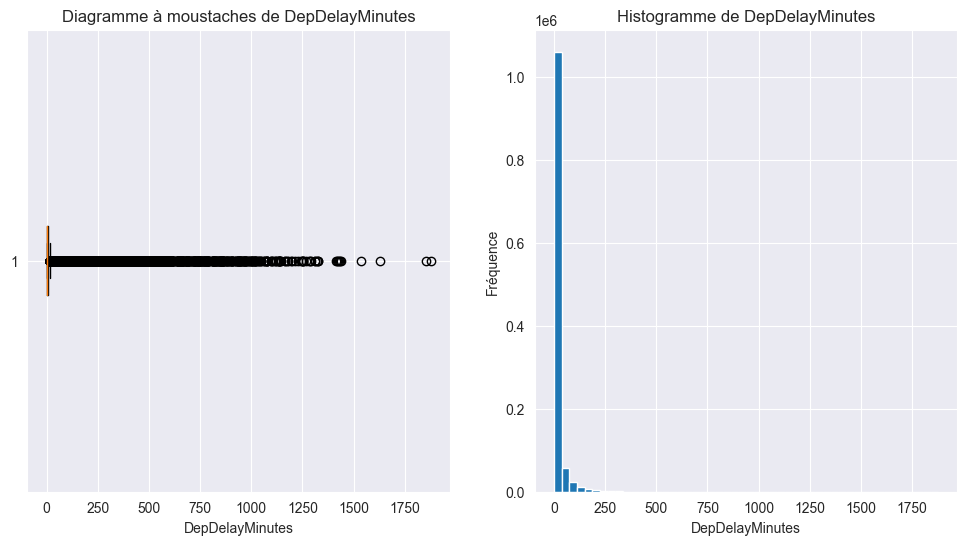

In [86]:
# Création d'un diagramme à moustaches (box plot)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_filtered["DepDelayMinutes"].dropna(), vert=False)
plt.xlabel("DepDelayMinutes")
plt.title("Diagramme à moustaches de DepDelayMinutes")

# Création d'un histogramme
plt.subplot(1, 2, 2)
plt.hist(df_filtered["DepDelayMinutes"].dropna(), bins=50)
plt.xlabel("DepDelayMinutes")
plt.ylabel("Fréquence")
plt.title("Histogramme de DepDelayMinutes")

# Affichage des graphiques
plt.show()

In [ ]:
df_filtered = df[(df["ArrDelayMinutes"] >= 0)]
stats = df_filtered["ArrDelayMinutes"].describe()

print("Statistiques de ArrDelayMinutes :")
print(f"Nombre de valeurs non nulles : {stats['count']:.0f}")
print(f"Moyenne : {stats['mean']:.2f}")
print(f"Écart type : {stats['std']:.2f}")
print(f"Valeur minimale : {stats['min']:.0f}")
print(f"Premier quartile (Q1) : {stats['25%']:.2f}")
print(f"Médiane (deuxième quartile) : {stats['50%']:.2f}")
print(f"Troisième quartile (Q3) : {stats['75%']:.2f}")
print(f"Valeur maximale : {stats['max']:.0f}")

In [ ]:
# Création d'un diagramme à moustaches (box plot)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_filtered["ArrDelayMinutes"].dropna(), vert=False)
plt.xlabel("ArrDelayMinutes")
plt.title("Diagramme à moustaches de ArrDelayMinutes")

# Création d'un histogramme
plt.subplot(1, 2, 2)
plt.hist(df_filtered["ArrDelayMinutes"].dropna(), bins=50)
plt.xlabel("ArrDelayMinutes")
plt.ylabel("Fréquence")
plt.title("Histogramme de ArrDelayMinutes")

# Affichage des graphiques
plt.show()

In [ ]:
from scipy import stats

def grubbs_test(data, alpha=0.05):
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    abs_diffs = np.abs(data - mean)
    max_abs_diff = np.max(abs_diffs)
    max_index = np.argmax(abs_diffs)
    
    G_calculated = max_abs_diff / std_dev
    t = stats.t.ppf(1 - alpha / (2 * n), n - 2)
    G_critical = ((n - 1) * np.sqrt(np.square(t))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t)))
    
    if G_calculated > G_critical:
        print(f"Valeur aberrante détectée : {data[max_index]}")
        data = np.delete(data, max_index)
    else:
        print("Aucune valeur aberrante détectée")
    
    return data

# Exemple d'utilisation
data = np.array(df_filtered["DepDelayMinutes"])
data_without_outliers = grubbs_test(data)

### Nettoyage des valeurs abbérantes
On n'a remarqué que le temps de retard varie concédérablement sur quelques vols et il peut atteindre jusqu'à plus de 31 alors que le 3ème quartile est à 37 minutes. Donc, on a utilisé la transformation pour supprimer ces valeurs abérantes.

In [ ]:
def drop_outliers(df, columns, quantile_min=0.01, quantile_max=0.99, verbose=False):
    df_copy = df.copy()
    total = 0
    quantiles = df_copy.quantile((quantile_min, quantile_max))

    for c in columns:
        to_drop = np.where(np.logical_or(df_copy[c] < quantiles[c][quantile_min],
                                         df_copy[c] > quantiles[c][quantile_max]))[0]

        if verbose:
            print(f"Dropped {len(to_drop)} lines for column {c}.")

        total += len(to_drop)
        df_copy.drop(index=to_drop, inplace=True)
        df_copy.reset_index(inplace=True, drop=True)

    if verbose:
        print(f"Total dropped lines : {total}")

    return df_copy

col = {'DepDelayMinutes','ArrDelayMinutes'}
df = drop_outliers(df, col, verbose=True)

In [ ]:
#df.to_csv('DataFlightFinal.csv', index=False)